In [39]:
import json
import pyspark as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 15]

import arcweld_helper as arc

In [2]:
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("df case study") \
            .config("spark.sql.caseSensitive", "true")\
            .getOrCreate()
sc = spark.sparkContext 
tweets_df = spark.read.json('./data/french_tweets.json').sample(False, 0.2)

tweets_df.createOrReplaceTempView('df')

In [3]:
query = "SELECT \
           entities \
           , favorited \
           , favorite_count \
           , retweet_count \
        FROM \
           df \
        WHERE \
           favorite_count = 0 \
        LIMIT 10;"

spark.sql(query).show()

+--------------------+---------+--------------+-------------+
|            entities|favorited|favorite_count|retweet_count|
+--------------------+---------+--------------+-------------+
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], [{...|    false|             0|            0|
|{[], null, [], [{...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], []...|    false|             0|            0|
|{[], null, [], [{...|    false|             0|            0|
+--------------------+---------+--------------+-------------+



In [4]:
arc.sql_query_on_df(spark, tweets_df, query)

DataFrame[entities: struct<hashtags:array<struct<indices:array<bigint>,text:string>>,media:array<struct<display_url:string,expanded_url:string,id:bigint,id_str:string,indices:array<bigint>,media_url:string,media_url_https:string,sizes:struct<large:struct<h:bigint,resize:string,w:bigint>,medium:struct<h:bigint,resize:string,w:bigint>,small:struct<h:bigint,resize:string,w:bigint>,thumb:struct<h:bigint,resize:string,w:bigint>>,source_status_id:bigint,source_status_id_str:string,source_user_id:bigint,source_user_id_str:string,type:string,url:string>>,symbols:array<struct<indices:array<bigint>,text:string>>,urls:array<struct<display_url:string,expanded_url:string,indices:array<bigint>,url:string>>,user_mentions:array<struct<id:bigint,id_str:string,indices:array<bigint>,name:string,screen_name:string>>>, favorited: boolean, favorite_count: bigint, retweet_count: bigint]

In [5]:
tweets_df.describe(['filter_level','favorite_count','retweet_count']).show()

+-------+------------+--------------+-------------+
|summary|filter_level|favorite_count|retweet_count|
+-------+------------+--------------+-------------+
|  count|       42974|         42974|        42974|
|   mean|        null|           0.0|          0.0|
| stddev|        null|           0.0|          0.0|
|    min|         low|             0|            0|
|    max|         low|             0|            0|
+-------+------------+--------------+-------------+



In [6]:
schema = tweets_df.printSchema()
schema

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

In [7]:
tweets_df.select('user').show()

+--------------------+
|                user|
+--------------------+
|{false, Mon Dec 0...|
|{false, Fri Jun 1...|
|{false, Wed Mar 0...|
|{false, Wed Sep 1...|
|{false, Fri Jan 2...|
|{false, Sat Apr 2...|
|{false, Mon Jan 2...|
|{false, Thu May 2...|
|{false, Wed Mar 1...|
|{false, Sat Mar 1...|
|{false, Thu Jul 1...|
|{false, Mon Oct 0...|
|{false, Mon Mar 3...|
|{false, Thu Jul 3...|
|{false, Sun Dec 1...|
|{false, Sun Feb 2...|
|{false, Sat Feb 0...|
|{false, Sat Dec 2...|
|{false, Fri Feb 2...|
|{false, Wed Feb 2...|
+--------------------+
only showing top 20 rows



In [8]:
result = spark.sql("SELECT contributors, retweet_count, text, retweeted FROM df LIMIT 10").toPandas()
result

,contributors,retweet_count,text,retweeted
0,None,0,@lecho_fr @lasaucelleoff J'espère faire mieux ...,False
1,None,0,au programme ce soir en Live :\n* Visite de Ho...,False
2,None,0,Choisir entre le coup de com.de marine ou le c...,False
3,None,0,@Fragsito @JozXII Mdr diffamation c'est fréque...,False
4,None,0,"@EmmanuelMacron Du blabla, je n'ai vraient pas...",False
5,None,0,Je supporte pas ce genre de personnes https://...,False
6,None,0,@ArtCoutelier ba arthur tu aimes le pen c'est ...,False
7,None,0,"fail, mon père vient de me réveiller pour que ...",False
8,None,0,(bon la qualité est dégueu parce que rt la co ...,False
9,None,0,Dit-il avant de voter blanc https://t.co/MnaBu...,False


In [9]:
query = "SELECT \
           entities \
           , favorited \
           , favorite_count \
           , retweet_count \
        FROM \
           df \
        WHERE \
           favorite_count != 0 \
        LIMIT 10;"

spark.sql(query).show()

+--------+---------+--------------+-------------+
|entities|favorited|favorite_count|retweet_count|
+--------+---------+--------------+-------------+
+--------+---------+--------------+-------------+



In [10]:
def CleanUp(rdd, columns):
    return (rdd[columns].withColumn('user_id', rdd['user.id'])
            .withColumn('user_screen_name', rdd['user.screen_name'])
            .withColumn('place_type', rdd['place.place_type'])
            .withColumn('place_coordinates', rdd['place.bounding_box.coordinates'])
            .withColumn('hashtags', rdd['entities.hashtags.text'])
            .withColumn('mentions_id', rdd['entities.user_mentions.id'])
            .drop('user')
            .drop('place')
            .drop('entities')
           )

cleaned = CleanUp(tweets_df, ['entities', 'filter_level', 'id', 'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive', 'text', 'timestamp_ms', 'user'])


In [11]:
cleaned.createOrReplaceTempView('df')
cleaned.printSchema()
cleaned.describe()

root
 |-- filter_level: string (nullable = true)
 |-- id: long (nullable = true)
 |-- in_reply_to_user_id: long (nullable = true)
 |-- lang: string (nullable = true)
 |-- possibly_sensitive: boolean (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp_ms: string (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_screen_name: string (nullable = true)
 |-- place_type: string (nullable = true)
 |-- place_coordinates: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: array (containsNull = true)
 |    |    |    |-- element: double (containsNull = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- mentions_id: array (nullable = true)
 |    |-- element: long (containsNull = true)



DataFrame[summary: string, filter_level: string, id: string, in_reply_to_user_id: string, lang: string, text: string, timestamp_ms: string, user_id: string, user_screen_name: string, place_type: string]

In [12]:
query = "SELECT \
           id \
        FROM \
           df \
        LIMIT 10;"

spark.sql(query).show()

+------------------+
|                id|
+------------------+
|857225441157021697|
|857225482999300096|
|857225488275824642|
|857225525462487043|
|857225529484857344|
|857225535923126275|
|857225556487794689|
|857225607020728321|
|857225611420545024|
|857225623005261824|
+------------------+



In [13]:
cleaned.select('timestamp_ms').show()

+-------------+
| timestamp_ms|
+-------------+
|1493213446307|
|1493213456283|
|1493213457541|
|1493213466407|
|1493213467366|
|1493213468901|
|1493213473804|
|1493213485852|
|1493213486901|
|1493213489663|
|1493213492517|
|1493213495760|
|1493213497634|
|1493213500521|
|1493213509766|
|1493213517990|
|1493213519713|
|1493213531997|
|1493213535192|
|1493213536297|
+-------------+
only showing top 20 rows



In [14]:
import time
time.ctime(1493213499348)

'Mon Jan 19 15:35:48 49288'

In [15]:
query = "SELECT \
           id \
           , timestamp_ms \
        FROM \
           df \
        LIMIT 10;"

spark.sql(query).show()

+------------------+-------------+
|                id| timestamp_ms|
+------------------+-------------+
|857225441157021697|1493213446307|
|857225482999300096|1493213456283|
|857225488275824642|1493213457541|
|857225525462487043|1493213466407|
|857225529484857344|1493213467366|
|857225535923126275|1493213468901|
|857225556487794689|1493213473804|
|857225607020728321|1493213485852|
|857225611420545024|1493213486901|
|857225623005261824|1493213489663|
+------------------+-------------+



In [62]:
def coords_estimate(entry):
    '''
    params: row: the individual row of the dataframe
    returns: an array of length 2 with the average x and y coordinates of the bounding box.
    '''
    coords = np.array(entry[0])
    return np.mean(coords, axis = 0) 

pd_df = cleaned.toPandas()

pd_df['coord_estimates'] = pd_df['place_coordinates'].dropna().apply(coords_estimate)
type(pd_df)

pandas.core.frame.DataFrame

In [61]:
df2 = pd.DataFrame(pd_df['coord_estimates'].to_list(), columns=['x','y'])
pd_df['x'] = pd_df()

TypeError: 'float' object is not iterable

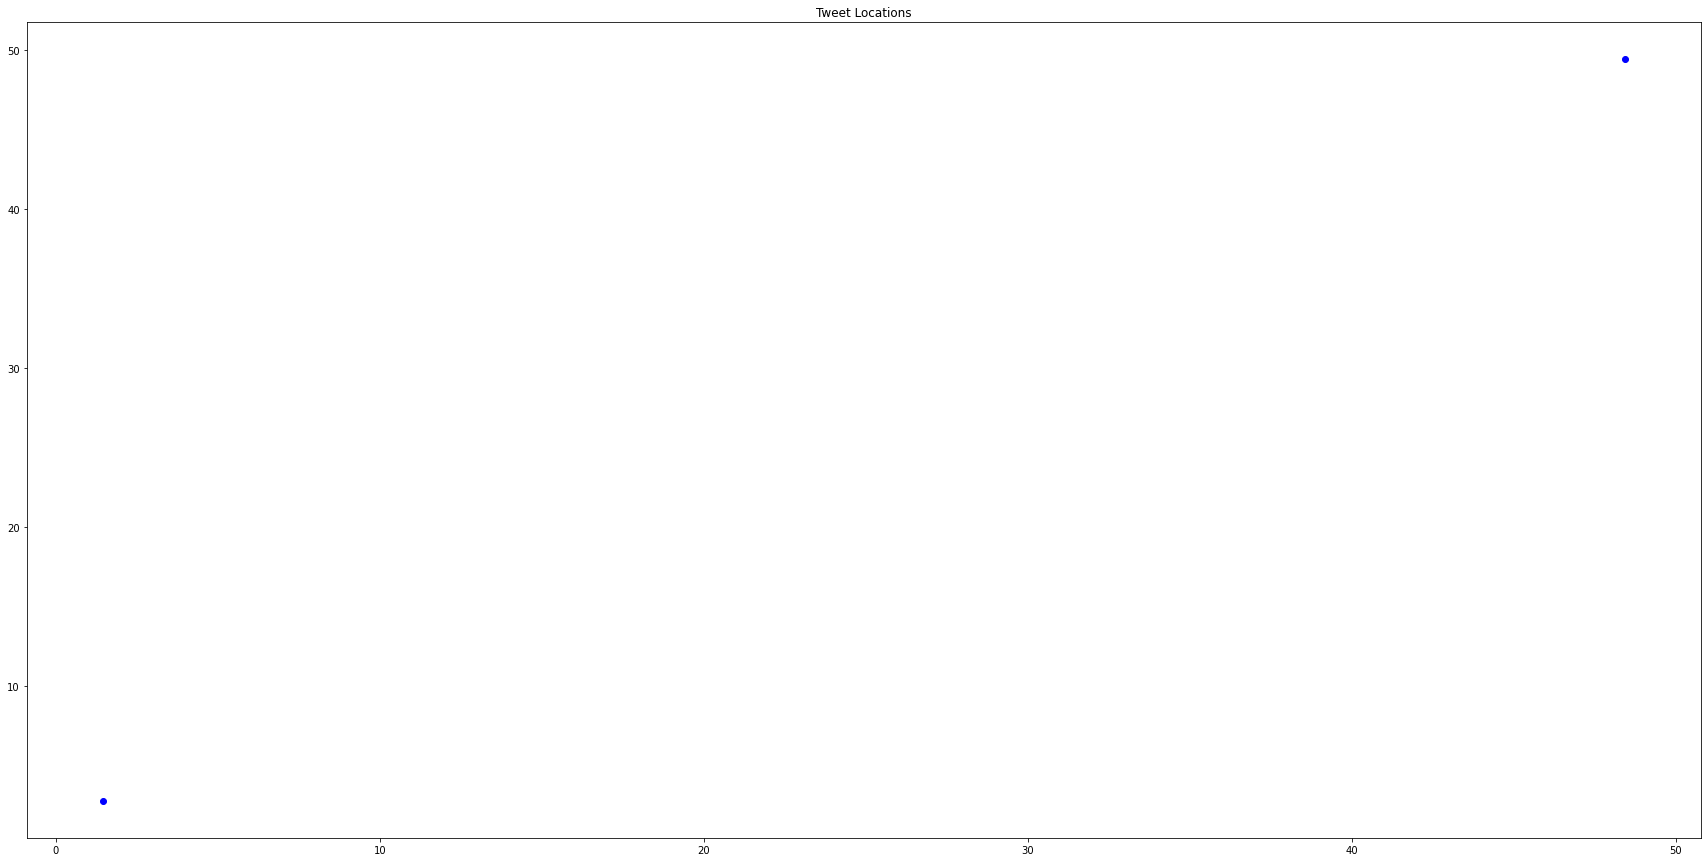

In [49]:
fig, ax = plt.subplots()

ax.scatter(pd_df['coord_estimates'][0], pd_df['coord_estimates'][1], color = 'blue', marker = 'o')
ax.set_title('Tweet Locations')
plt.show()

ValueError: setting an array element with a sequence.

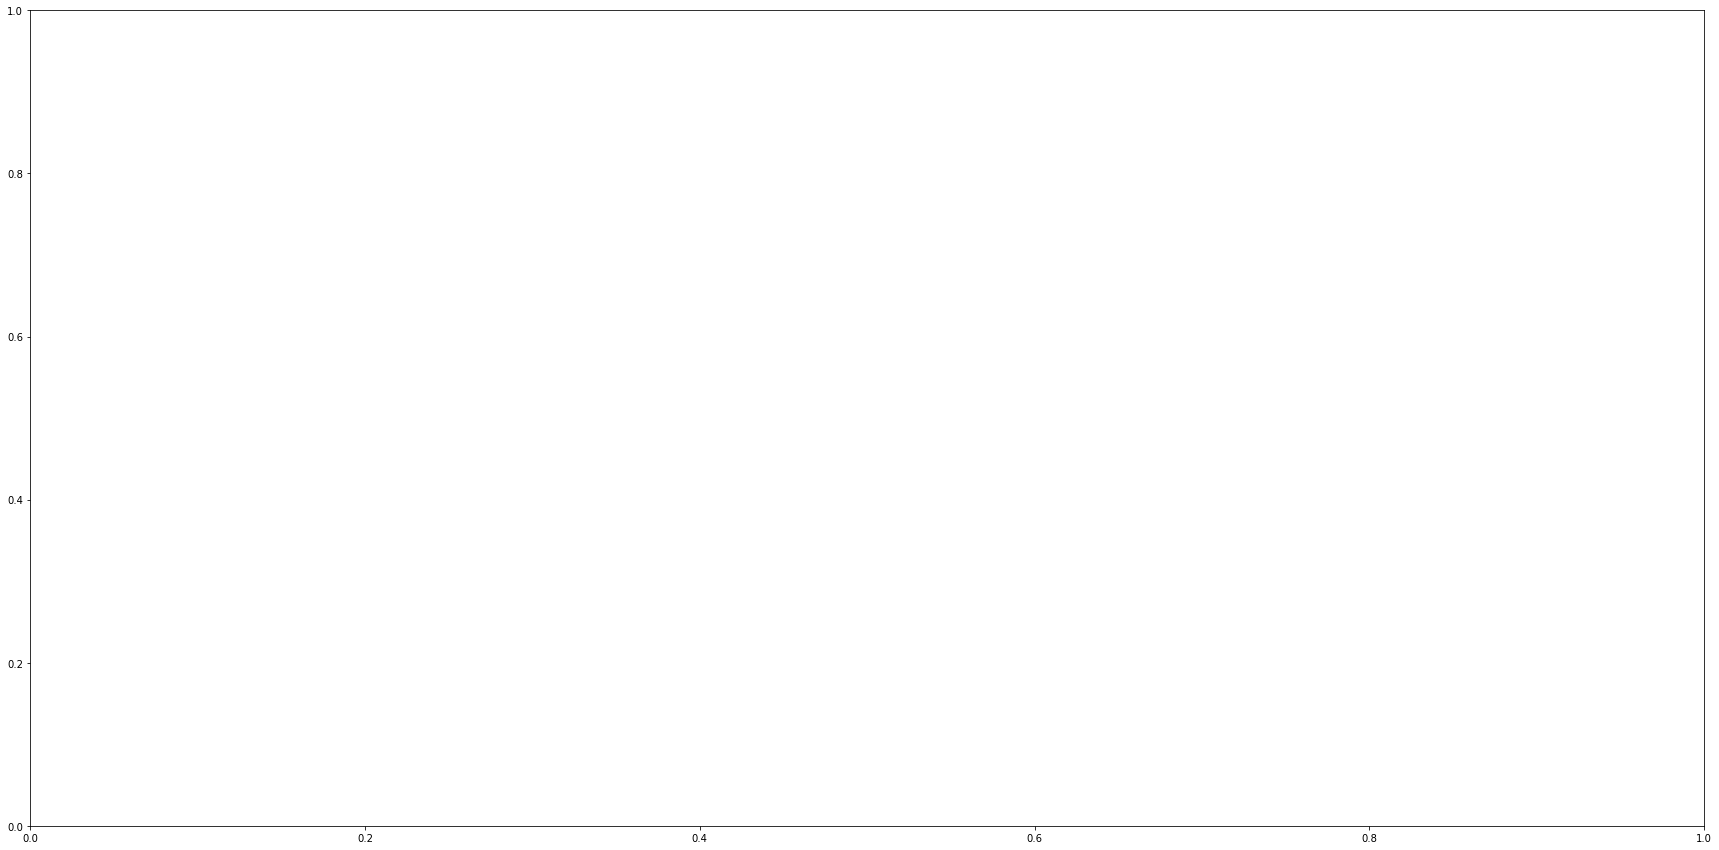

In [64]:
pd_df.plot(kind='scatter', x='coord_estimates', y='coord_estimates')